<a href="https://colab.research.google.com/github/bsap16/risco_relativo/blob/main/risco_relativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de risco relativo de inadimplência

##Bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve

In [2]:
df = pd.read_csv('risco_relativo.csv')

##Distribuição dos dados

###Medidas de tendência central

In [3]:
from IPython.display import display
media_ultimo_salario = df['ultimo_salario'].mean()
media_linhas_credito = df['linhas_de_credito_nao_garantidas_por_ativos_pessoais'].mean()
media_endividamento = df['indice_endividamento'].mean()

median_ultimo_salario = df['ultimo_salario'].median()
median_linhas_credito = df['linhas_de_credito_nao_garantidas_por_ativos_pessoais'].median()
median_endividamento = df['indice_endividamento'].median()

tabela_resumo_central = pd.DataFrame({
    'Medida de Tendência Central': ['Média', 'Mediana'],
    'Último salário mensal' : [media_ultimo_salario, median_ultimo_salario],
    'Linhas de crédito não garantidas por ativos pessoais' : [media_linhas_credito, median_linhas_credito],
    'Índice de endividamento' : [media_endividamento, median_endividamento]
})

display(tabela_resumo_central)

,Medida de Tendência Central,Último salário mensal,Linhas de crédito não garantidas por ativos pessoais,Índice de endividamento
0,Média,5118.22,0.54,23.226
1,Mediana,6622.00,1.00,0.000


Visualização da distribuição de dados depois das alterações de outliers destas variáveis em box plot.

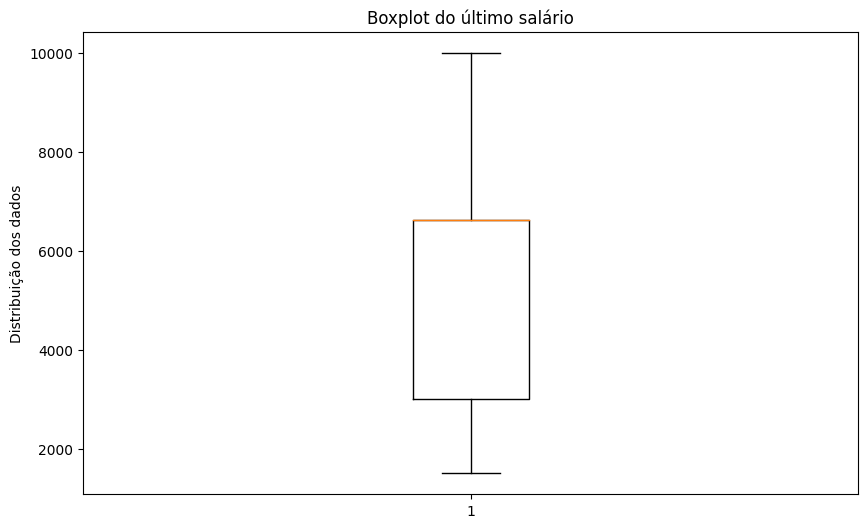

In [4]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['ultimo_salario'])
plt.title('Boxplot do último salário')
plt.ylabel('Distribuição dos dados')
plt.show()

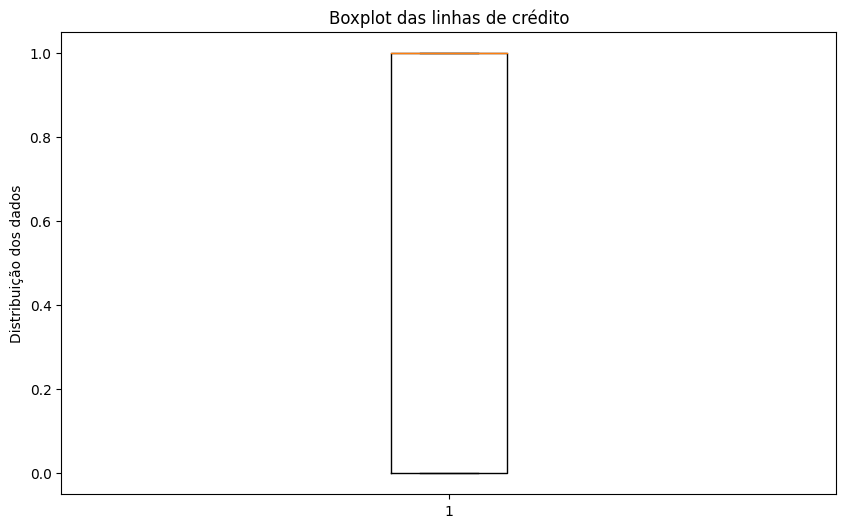

In [5]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['linhas_de_credito_nao_garantidas_por_ativos_pessoais'])
plt.title('Boxplot das linhas de crédito')
plt.ylabel('Distribuição dos dados')
plt.show()

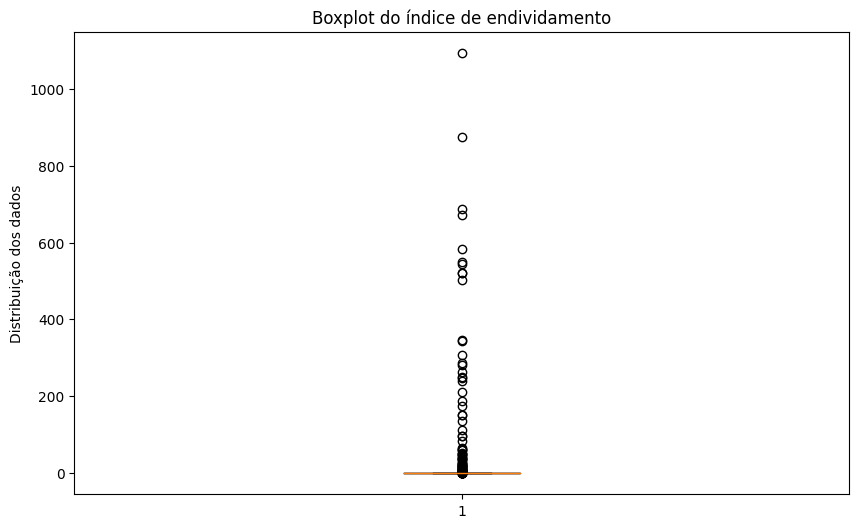

In [6]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['indice_endividamento'])
plt.title('Boxplot do índice de endividamento')
plt.ylabel('Distribuição dos dados')
plt.show()

###Medidas de dispersão

In [7]:
sum_ultimo_salario = df['ultimo_salario'].sum()
sum_linhas_credito = df['linhas_de_credito_nao_garantidas_por_ativos_pessoais'].sum()
sum_endividamento = df['indice_endividamento'].sum()

varience_ultimo_salario = df['ultimo_salario'].var()
varience_linhas_credito = df['linhas_de_credito_nao_garantidas_por_ativos_pessoais'].var()
varience_endividamento = df['indice_endividamento'].var()

standard_deviation_ultimo_salario = df['ultimo_salario'].std()
standard_deviation_linhas_credito = df['linhas_de_credito_nao_garantidas_por_ativos_pessoais'].std()
standard_deviation_endividamento = df['indice_endividamento'].std()

tabela_resumo_dispersao = pd.DataFrame({
    'Medida de Dispersão': ['Soma', 'Variação', 'Desvio Padrão'],
    'Último salário mensal' : [sum_ultimo_salario, varience_ultimo_salario, standard_deviation_ultimo_salario],
    'Linhas de crédito não garantidas por ativos pessoais' : [sum_linhas_credito, varience_linhas_credito, standard_deviation_linhas_credito],
    'Índice de endividamento' : [sum_endividamento, varience_endividamento, standard_deviation_endividamento]
})

tabela_resumo_dispersao = tabela_resumo_dispersao.round(2)

display(tabela_resumo_dispersao)

,Medida de Dispersão,Último salário mensal,Linhas de crédito não garantidas por ativos pessoais,Índice de endividamento
0,Soma,2559110.00,270.00,11613.0
1,Variação,4239370.08,0.25,10712.9
2,Desvio Padrão,2058.97,0.50,103.5


##Matriz de confusão e regressão logística com dados desbalanceados

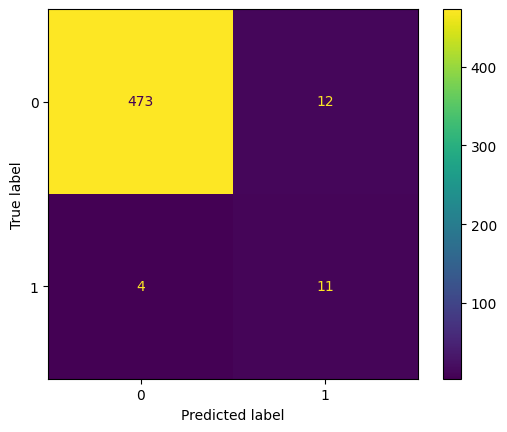

[[473  12]
 [  4  11]]


In [8]:
y_true = ['indicador_inadimplencia']
y_pred = ['total_binario']

matriz_confusao = confusion_matrix(df[y_true], df[y_pred])
disp = ConfusionMatrixDisplay(matriz_confusao)
disp.plot()
plt.show()
print(matriz_confusao)

In [9]:
acuracidade = accuracy_score(df[y_true], df[y_pred])
precisao = precision_score(df[y_true], df[y_pred])
recall = recall_score(df[y_true], df[y_pred])
f1 = f1_score(df[y_true], df[y_pred])
print("Acurácia:", acuracidade)
print("Precisão:", precisao)
print("Recall:", recall)
print("F1-score:", f1)

Acurácia: 0.968
Precisão: 0.4782608695652174
Recall: 0.7333333333333333
F1-score: 0.5789473684210527


AUC: 0.8127147766323023


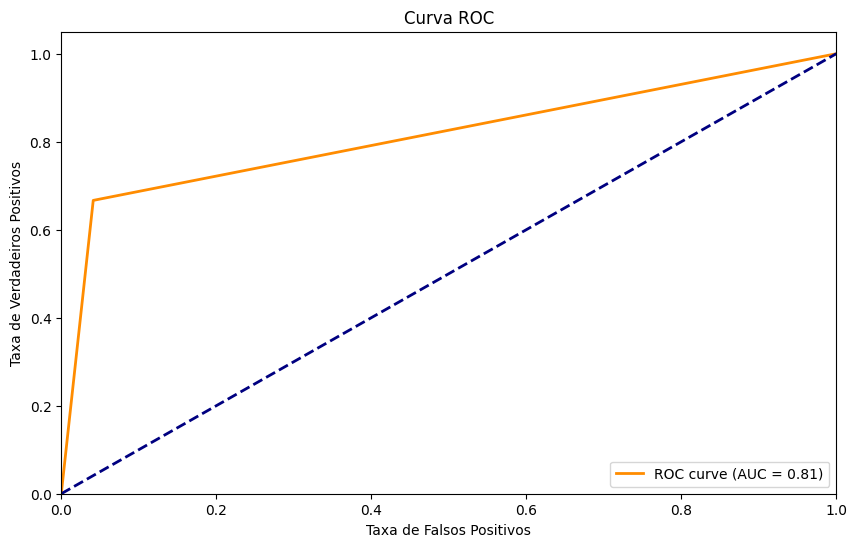

In [10]:
X = df[['total_binario']]
y = df['indicador_inadimplencia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_train, y_train)

y_pred = modelo_logistico.predict(X_test)
y_prob = modelo_logistico.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC:", roc_auc)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


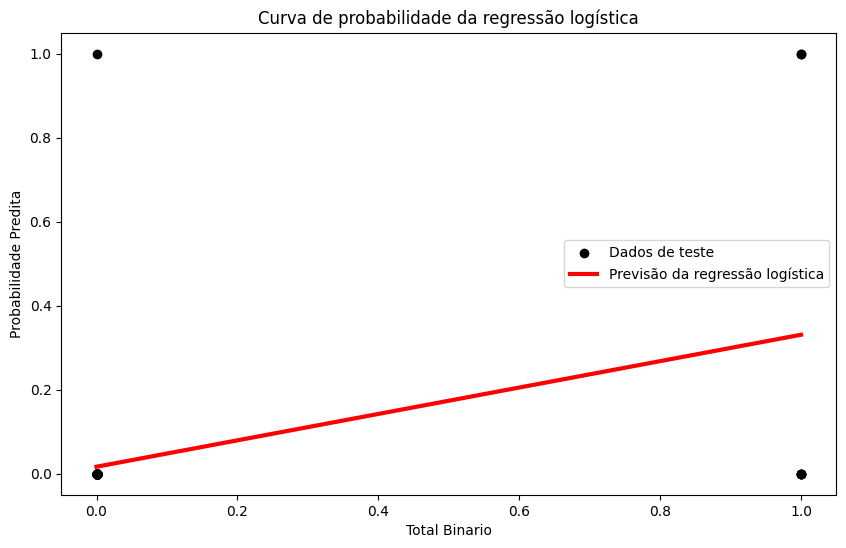

In [11]:
X = df[['total_binario']]
y = df['indicador_inadimplencia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_pred = modelo_logistico.predict_proba(X_test)[:, 1]

X_test_sorted, y_test_sorted = zip(*sorted(zip(X_test['total_binario'], y_pred)))

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', zorder=20, label='Dados de teste')
plt.plot(X_test_sorted, y_test_sorted, color='red', linewidth=3, label='Previsão da regressão logística')
plt.title('Curva de probabilidade da regressão logística')
plt.xlabel('Total Binario')
plt.ylabel('Probabilidade Predita')
plt.legend()
plt.show()

In [12]:
tabela_resumo_metricas_desbalanceada = pd.DataFrame({
    'Métricas': ['Acurácia', 'Precisão', 'Recall', 'F1-score', 'AUC'],
    'Dados desbalanceado': [acuracidade, precisao, recall, f1, roc_auc]
})
tabela_resumo_metricas_desbalanceada = tabela_resumo_metricas_desbalanceada.round(2)
display(tabela_resumo_metricas_desbalanceada)

,Métricas,Dados desbalanceado
0,Acurácia,0.97
1,Precisão,0.48
2,Recall,0.73
3,F1-score,0.58
4,AUC,0.81


##Matriz de confusão e regressão logística com balanceamento de classe

In [13]:
X = df[['total_binario']]
y = df['indicador_inadimplencia']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_train, y_train)

y_pred = modelo_logistico.predict(X_test)
y_prob = modelo_logistico.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

acuracidade = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Classification Report:\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("AUC:", roc_auc)

tabela_resumo_metricas_balanceada = pd.DataFrame({
    'Métricas': ['Acuracidade', 'Precisão', 'Recall', 'F1-score', 'AUC'],
    'Dados balanceados': [acuracidade, precisao, recall, f1, roc_auc]
})
tabela_resumo_metricas_balanceada = tabela_resumo_metricas_balanceada.round(2)
display(tabela_resumo_metricas_balanceada)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.98      0.87        96
           1       0.97      0.72      0.83        98

    accuracy                           0.85       194
   macro avg       0.87      0.85      0.85       194
weighted avg       0.88      0.85      0.85       194

[[94  2]
 [27 71]]
AUC: 0.851828231292517


,Métricas,Dados balanceados
0,Acuracidade,0.85
1,Precisão,0.97
2,Recall,0.72
3,F1-score,0.83
4,AUC,0.85


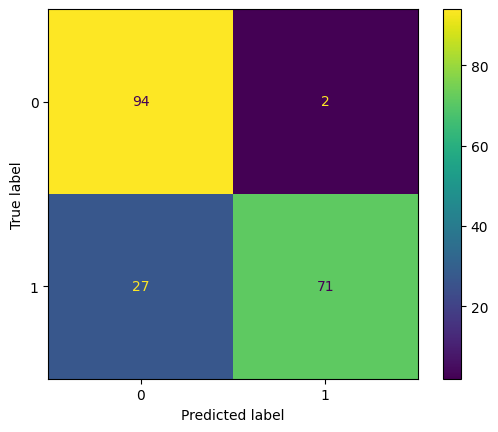

In [14]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

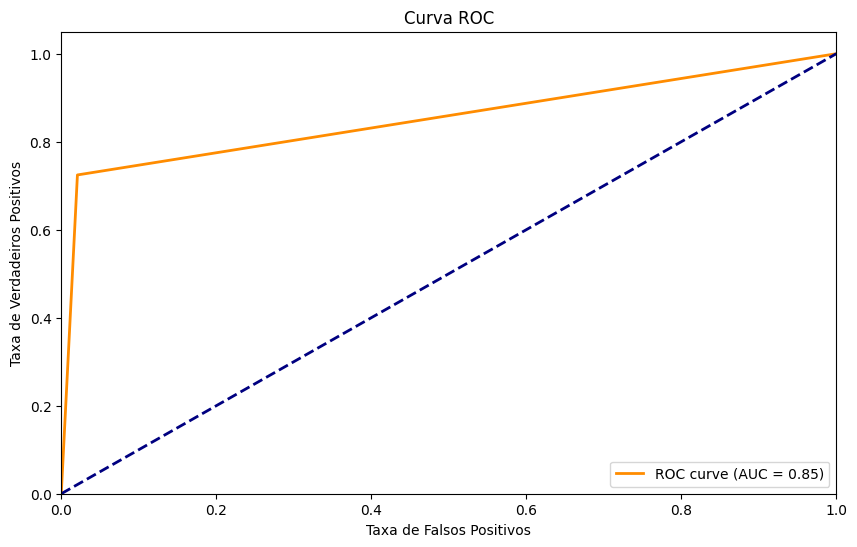

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

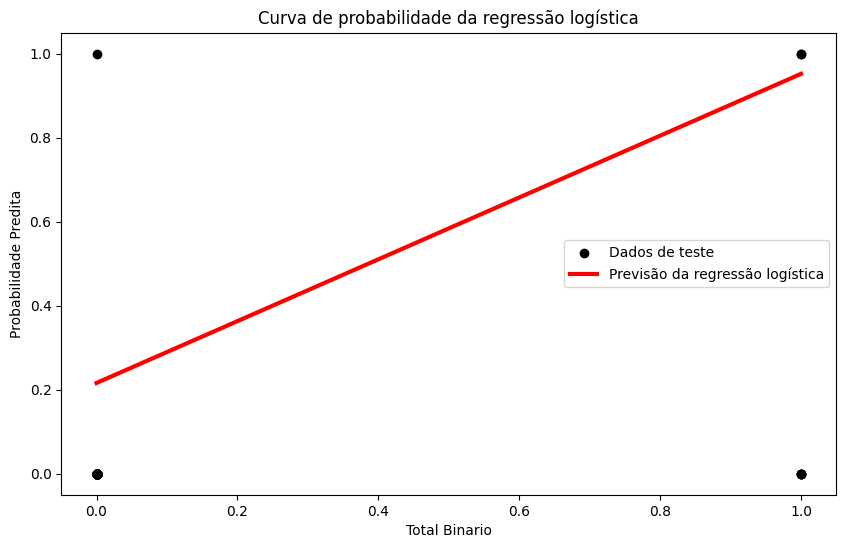

In [16]:
X = df[['total_binario']]
y = df['indicador_inadimplencia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_pred = modelo_logistico.predict_proba(X_test)[:, 1]

X_test_sorted, y_test_sorted = zip(*sorted(zip(X_test['total_binario'], y_pred)))

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', zorder=20, label='Dados de teste')
plt.plot(X_test_sorted, y_test_sorted, color='red', linewidth=3, label='Previsão da regressão logística')
plt.title('Curva de probabilidade da regressão logística')
plt.xlabel('Total Binario')
plt.ylabel('Probabilidade Predita')
plt.legend()
plt.show()